<a href="https://colab.research.google.com/github/Dennis-Farias/cursoIAeML/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

In [ ]:
dataset_train.shape

In [ ]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train)

In [ ]:
X_train.shape

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

In [ ]:
modelo = Sequential()
modelo.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units = 50, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units = 50, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units = 50))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 1))

In [ ]:
modelo.compile(optimizer = 'adam', loss = 'mean_squared_error')
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=30)
modelo.fit(X_train, y_train, epochs = 500, batch_size = 32, callbacks=[es])

In [13]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [14]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs

In [ ]:
inputs = inputs.reshape(-1,1)
inputs

In [ ]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = modelo.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

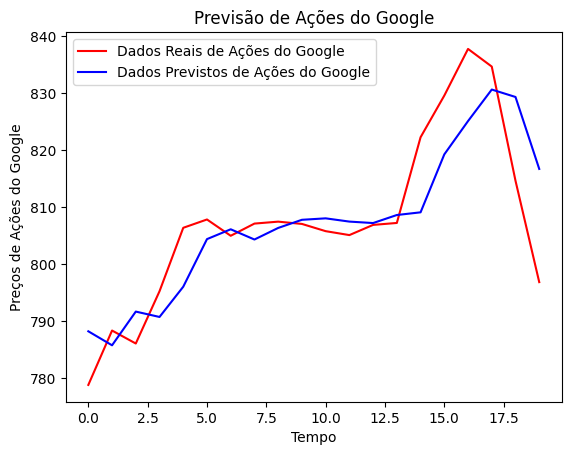

In [19]:
plt.plot(real_stock_price, color = 'red', label = 'Dados Reais de Ações do Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Dados Previstos de Ações do Google')
plt.title('Previsão de Ações do Google')
plt.xlabel('Tempo')
plt.ylabel('Preços de Ações do Google')
plt.legend()
plt.show()